In [745]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,f1_score
from scipy import stats
# setting display options to display all columns.
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',100)

warnings.filterwarnings('ignore')

In [746]:
# Importing data
df=pd.read_csv('churnDetails.csv')
# Displaying first 5 rows of our dataset
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [747]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [748]:
df.shape

(7043, 21)

In [749]:
print('Number of rows in our dataset are:',df.shape[0])
print('Number of columns in our dataset are:',df.shape[1])

Number of rows in our dataset are: 7043
Number of columns in our dataset are: 21


In [750]:
# displating data type of each column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [751]:
# Displaying null values in our column.
x = df.isnull().sum()
y = (df.isnull().sum()/df.shape[0])*100
data_null = pd.DataFrame({'Total':x,'Percentage':y})
data_null

,Total,Percentage
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0


In [752]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* Apparently, there are no missing values.It is clearly seen that ‘Total Charges’ is of "object type" . We can use pd.to_numeric to convert it.

In [753]:
df["TotalCharges"].dtypes

dtype('O')

In [754]:
df["TotalCharges"]=pd.to_numeric(df.TotalCharges,errors='coerce')



In [755]:
df['TotalCharges'].dtype

dtype('float64')

In [756]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**After changing a column from object dtype to numeric, some missing values may not be recognized, resulting after coverting into numeric , it is showing missing values. 

In [757]:
print(df[df['TotalCharges'].isna()].index)

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


In [758]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

** After confirming our suspects, we can replace those missing values with the median of the respective columns .


In [759]:
df.fillna(df["TotalCharges"].median(),inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [760]:
df.SeniorCitizen.replace(to_replace=[0,1],value=["No","Yes"],inplace=True)

** The feature 'Senior Citizen', which is categorical ('Yes' or 'No'), is set as numeric. Although all features will be changed to numeric to be used in our prediction models, I'll convert it from numeric to string for now.

In [761]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


In [762]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [763]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [764]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


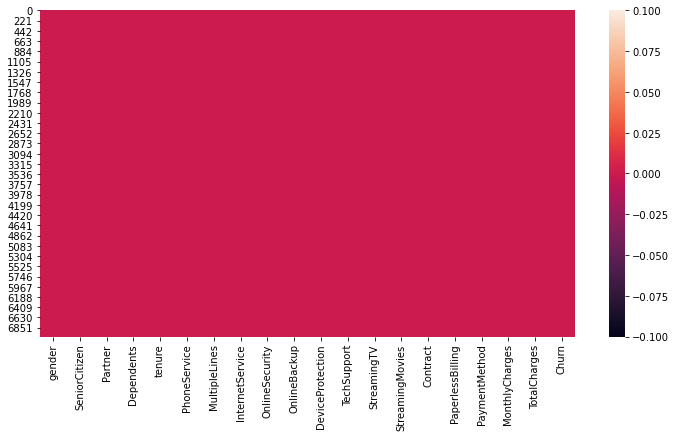

In [765]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.show()

# Analysis of Churn Feature

In [766]:
df["Churn"].value_counts()  

No     5174
Yes    1869
Name: Churn, dtype: int64

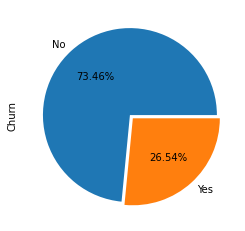

In [767]:
df["Churn"].value_counts().plot(kind="pie",autopct="%1.2f%%",explode = [0,0.05])
plt.show()

**26.54 % Customer who churns.

**73.46% customer who do not churns.

**In this dataset, only 26% of consumers are churn, while just over 73% are not. This denotes an extremely unbalanced base.

**In the data preparation stage, techniques for handling unbalanced data will be evaluated.

In [768]:
df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650864
TotalCharges,0.825464,0.650864,1.000000


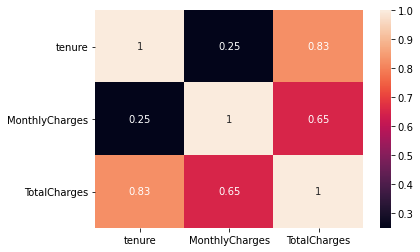

In [769]:
sns.heatmap(df.corr(),annot=True)

* Correlation among features

In [770]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Univariate analysis of Numerical Features


# *  Using Boxplot

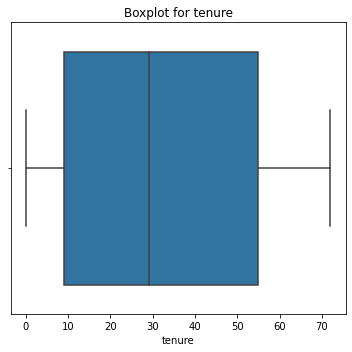

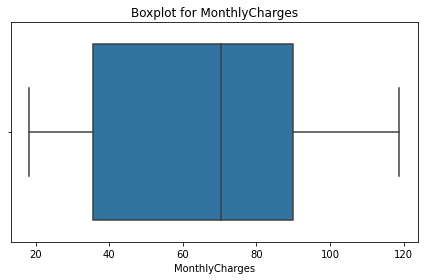

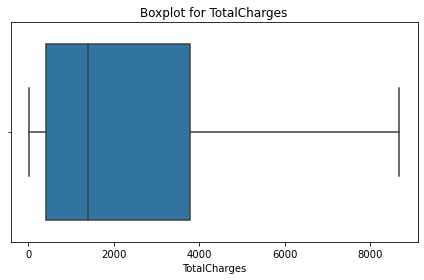

In [771]:
fig = plt.figure(figsize=(5,5))
for i in df.select_dtypes(include=np.number):
    sns.boxplot(df[i])
    plt.title('Boxplot for {}'.format(str(i)))
    plt.tight_layout()
    plt.show()

By Using IQR method,

* There is no outliers present in any of the numerical columns.
* The median of "tenure" is approximately 28.
* The median of "MonthlyCharges" is approximately 70.
* The median of "TotalCharges" is approximately 1400.

# Univariate Ananlysis by Kde plot

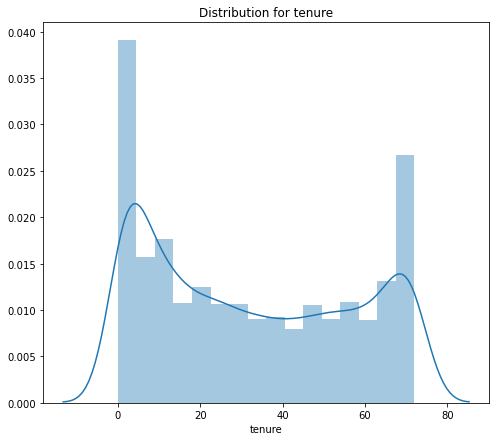

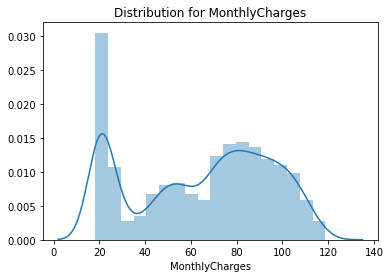

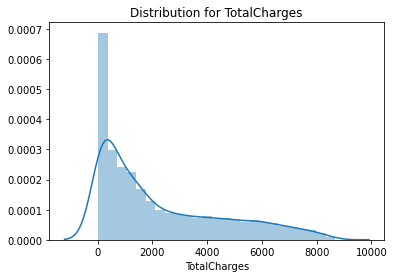

In [772]:

fig = plt.figure(figsize=(8,7))
for i in df.select_dtypes(include=np.number):
    sns.distplot(df[i])
    plt.title('Distribution for {}'.format(str(i)))
    plt.show()

* Tenure presents three peaks: It is  in almost uniform distribution , with peaks in customers with 0- 5 months and another in customers with more than 60 months.or we can write "Its Almost Uniformly Distributed".

* Monthly charges presents three peaks: one in 20 dollars, another around 50 dollars, and the last one in 90 dollars.

* Total charges features has a one-tailed distribution, it is positively skewed.
    

# Bivariate analysis of numerical features

# Churn with MonthlyCharges

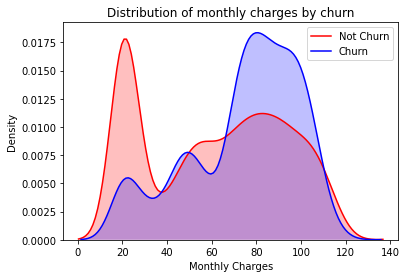

In [773]:
op = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
op = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =op, color="Blue", shade= True);
op.legend(["Not Churn","Churn"],loc='upper right');
op.set_ylabel('Density');
op.set_xlabel('Monthly Charges');
op.set_title('Distribution of monthly charges by churn');

* Customers with higher Monthly Charges are also more likely to churn.

* Monthly Charges: High concentration of churned customer in higher values (around 60 and beyond)

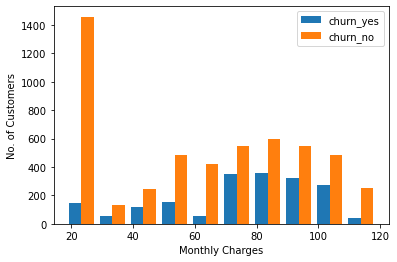

In [774]:
monthly_churn_yes=df[df.Churn=='Yes']['MonthlyCharges']
monthly_churn_no=df[df.Churn=='No']['MonthlyCharges']
plt.hist([monthly_churn_yes,monthly_churn_no],label=['churn_yes','churn_no'])
plt.legend()
plt.xlabel("Monthly Charges")
plt.ylabel("No. of Customers")
plt.show()

# Churn with TotalCharges

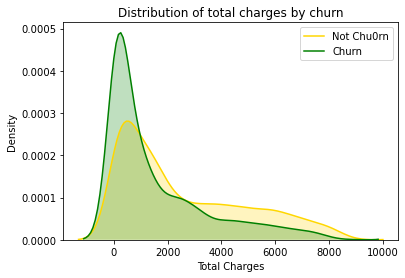

In [775]:

ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

*Total Charges: Somewhat similar distributions, but the ‘No churn’ distribution has lower values.


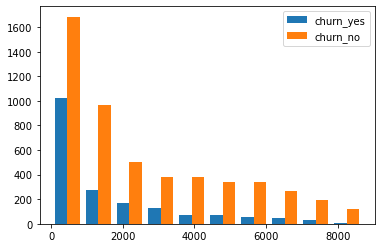

In [776]:
TotalCharges_churn_yes=df[df.Churn=='Yes']['TotalCharges']
TotalCharges_churn_no=df[df.Churn=='No']['TotalCharges']
plt.hist([TotalCharges_churn_yes,TotalCharges_churn_no],label=['churn_yes','churn_no'])
plt.legend()

# Churn with Tenure 

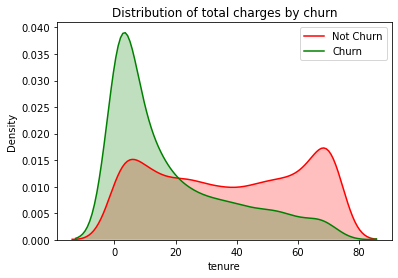

In [777]:
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('tenure');
ax.set_title('Distribution of total charges by churn');

* Tenure: Customers churning rate is high in first few months, and low when the tenure exceeds.

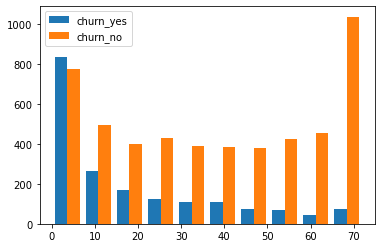

In [778]:
tenure_churn_yes=df[df.Churn=='Yes']['tenure']
tenure_churn_no=df[df.Churn=='No']['tenure']
plt.hist([tenure_churn_yes,tenure_churn_no],label=['churn_yes','churn_no'])
plt.legend()

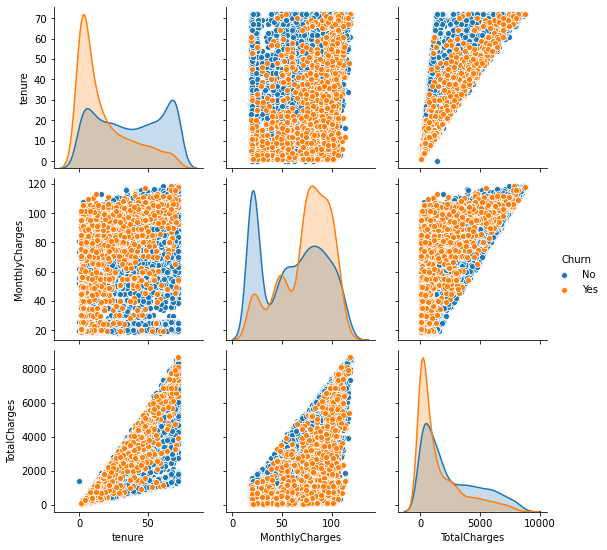

In [779]:
sns.pairplot(df,hue="Churn")

# Univariate  analysis of Categorical Columns 




### Sociodemographic information variables count 

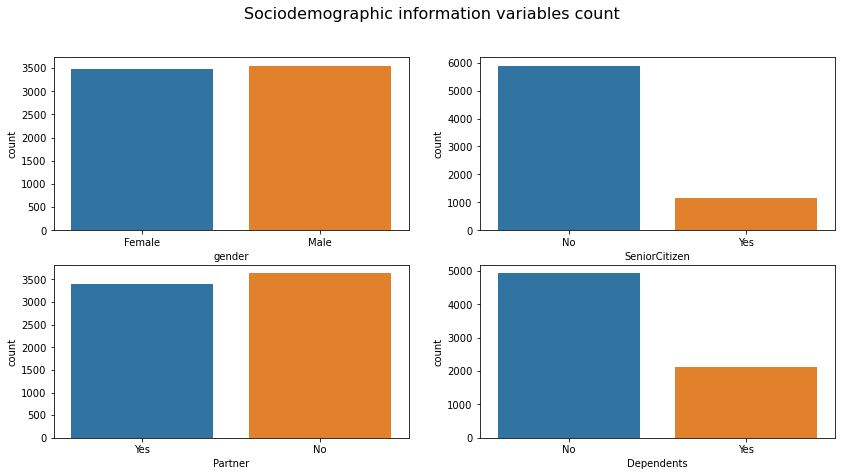

In [780]:
fig, axs = plt.subplots(2, 2, figsize=(14, 7))
sns.countplot(data=df, x="gender", ax=axs[0,0])
sns.countplot(data=df, x="SeniorCitizen", ax=axs[0,1])
sns.countplot(data=df, x="Partner", ax=axs[1,0])
sns.countplot(data=df, x="Dependents", ax=axs[1,1])
fig.suptitle('Sociodemographic information variables count', fontsize=16)
plt.show()

### Services information

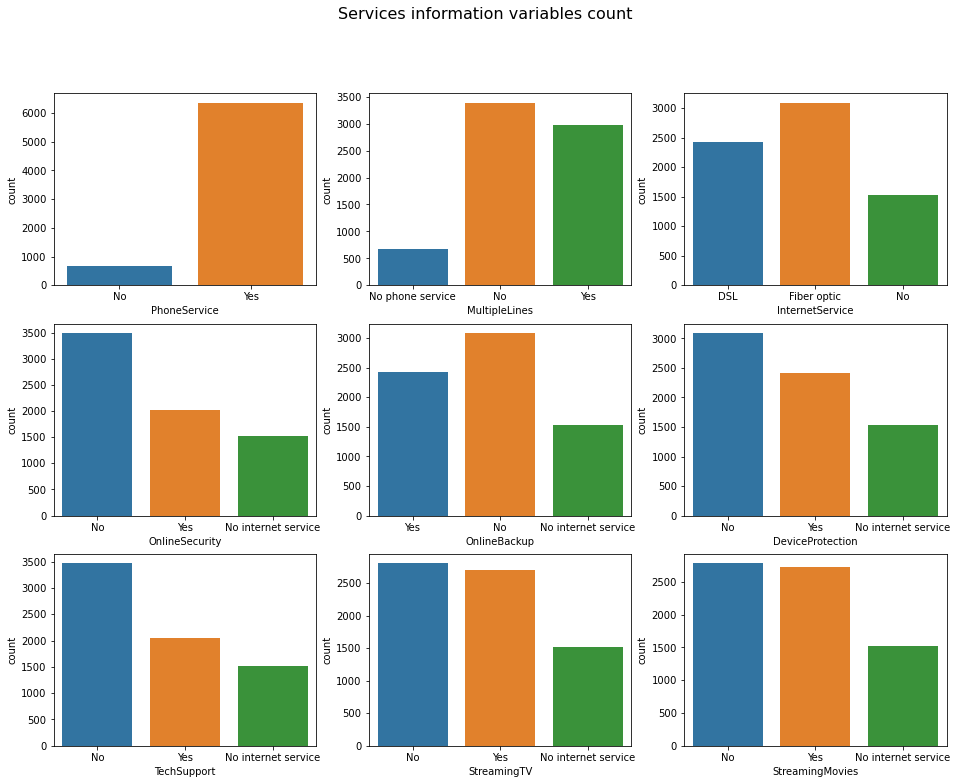

In [781]:
fig, axs = plt.subplots(3, 3, figsize=(16, 12))
sns.countplot(data=df, x="PhoneService", ax=axs[0,0])
sns.countplot(data=df, x="MultipleLines", ax=axs[0,1])
sns.countplot(data=df, x="InternetService", ax=axs[0,2])
sns.countplot(data=df, x="OnlineSecurity", ax=axs[1,0])
sns.countplot(data=df, x="OnlineBackup", ax=axs[1,1])
sns.countplot(data=df, x="DeviceProtection", ax=axs[1,2])
sns.countplot(data=df, x="TechSupport", ax=axs[2,0])
sns.countplot(data=df, x="StreamingTV", ax=axs[2,1])
sns.countplot(data=df, x="StreamingMovies", ax=axs[2,2])
fig.suptitle('Services information variables count', fontsize=16)
plt.show()

## Customer information

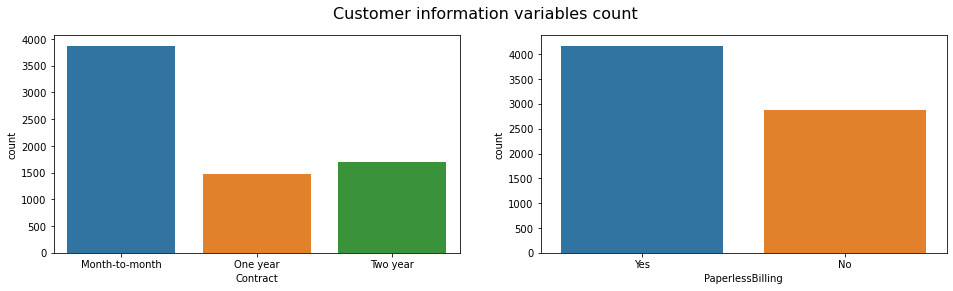

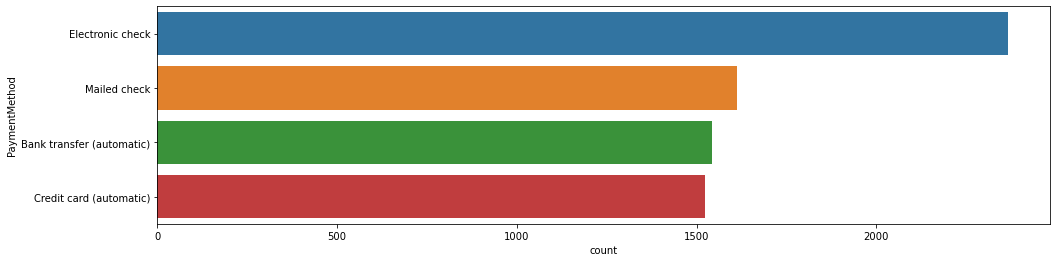

In [782]:

fig, axs = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df, x="Contract", ax=axs[0])
sns.countplot(data=df, x="PaperlessBilling", ax=axs[1])
fig.suptitle('Customer information variables count', fontsize=16)
fig, axs = plt.subplots(1, 1, figsize=(16, 4))
sns.countplot(data=df, y="PaymentMethod")
plt.show()

# Bivariate analysis of categorical features

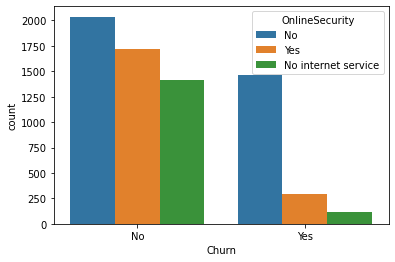

In [783]:
sns.countplot(x=df["Churn"],hue=df["OnlineSecurity"])

* Most customers churn in the absence of online security,


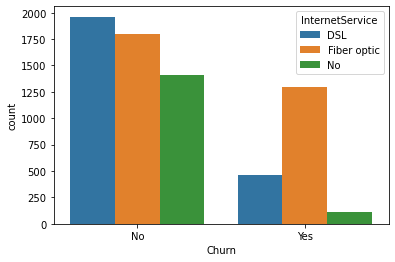

In [784]:
sns.countplot(data=df,hue=df["InternetService"],x=df["Churn"])

* The highest percentage of churn is from customers with fiber optic internet. 
* Fiber optic tends to be faster than DSL internet, but their subscription is usually more expensive as well

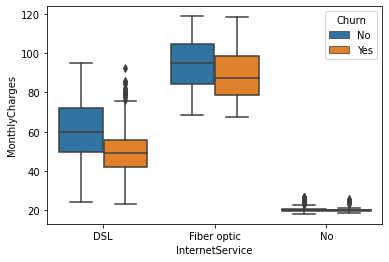

In [785]:
sns.boxplot(y=df.MonthlyCharges,x=df.InternetService,hue=df["Churn"])


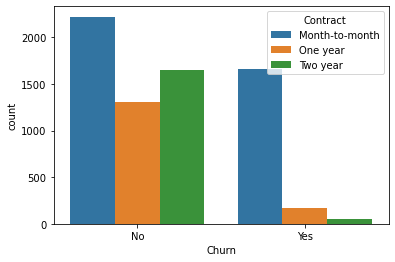

In [786]:
# Customer contract distribution
sns.countplot(df["Churn"],hue=df["Contract"])

In [787]:
print(df["Contract"].value_counts())
print()
print(df[df["Churn"]=="No"]["Contract"].value_counts(1))
print()
print(df[df["Churn"]=="Yes"]["Contract"].value_counts(1))




Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Month-to-month    0.429068
Two year          0.318322
One year          0.252609
Name: Contract, dtype: float64

Month-to-month    0.885500
One year          0.088818
Two year          0.025682
Name: Contract, dtype: float64


**About 88% of customer with Month-to-Month Contract opted to move out as compared to 25% of customrs with One Year Contract and 8% with Two Year Contract

# Payment Method distribution 

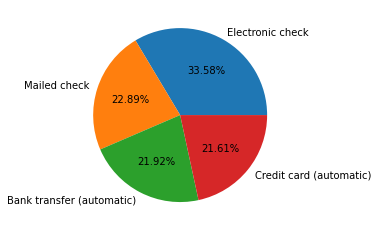

In [788]:
text = df['PaymentMethod'].unique()
val = df['PaymentMethod'].value_counts()
plt.pie(val,labels=text,autopct="%1.2f%%")
plt.show()




* 21.92% :cutomer doing payment through BANK TRANSFER
    
* 21.61%  customer make payment through Credit Card..

* 33.58% Customer make payment through Electronic Check..

* 22.89% customer make payment through Mailed Check...

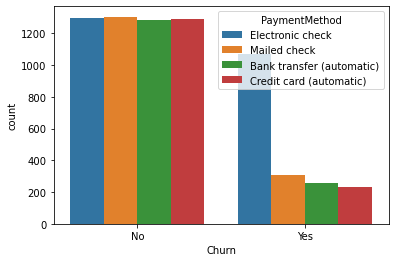

In [789]:
sns.countplot(df["Churn"],hue=df["PaymentMethod"])


* Most of the customers who moved out were having Elcetronic check as payment method, but the customers who opted for other payment method were less likely to churn.


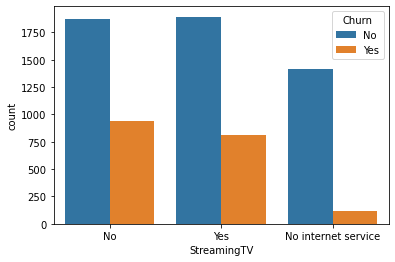

In [790]:
sns.countplot(x="StreamingTV",hue="Churn",data=df)

* customers with streaming tv option churn less than that of customers who dont have the service.

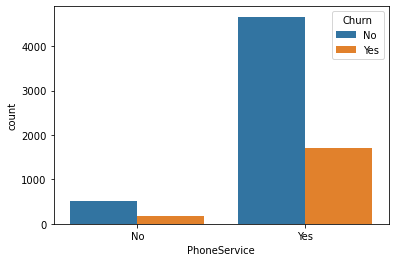

In [791]:
sns.countplot(x="PhoneService",hue="Churn",data=df)


In [792]:
ph_ser_N=df[df.PhoneService=="No"]["Churn"].value_counts(1)
ph_ser_Y=df[df.PhoneService=="Yes"]["Churn"].value_counts(1)
print(ph_ser_N)
print(ph_ser_Y)

No     0.750733
Yes    0.249267
Name: Churn, dtype: float64
No     0.732904
Yes    0.267096
Name: Churn, dtype: float64


* Very small fraction of customers don't have a phone service and out of that, approx 1/3rd Customers are more likely to churn.

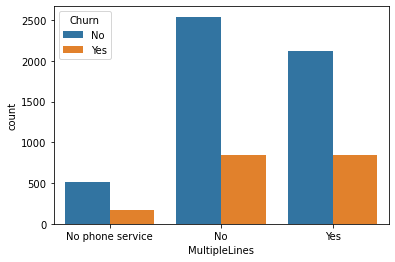

In [793]:
sns.countplot(x="MultipleLines",hue="Churn",data=df)


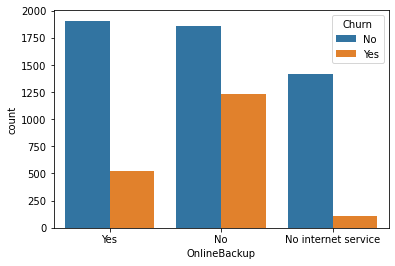

In [794]:
sns.countplot(x="OnlineBackup",hue="Churn",data=df)


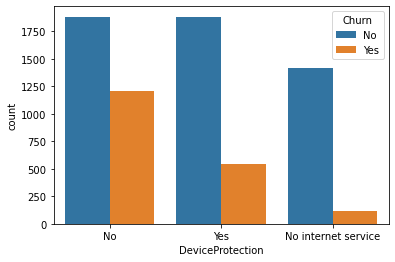

In [795]:
sns.countplot(x="DeviceProtection",hue="Churn",data=df)


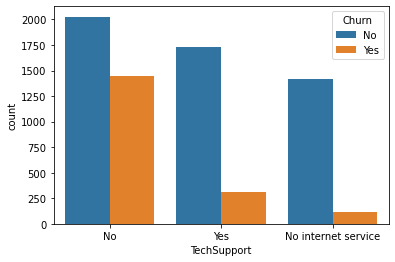

In [796]:
sns.countplot(x="TechSupport",hue="Churn",data=df)



* Customers with No TechSupport have high churning rate as compare to who have TechSupport . 

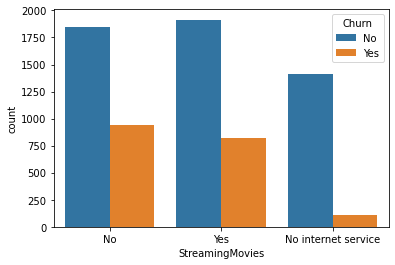

In [797]:
sns.countplot(x="StreamingMovies",hue="Churn",data=df)


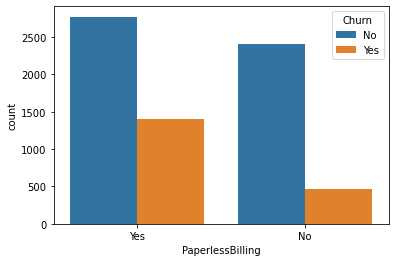

In [798]:
sns.countplot(x="PaperlessBilling",hue="Churn",data=df)

* Customers with Paperless Billing are most likely to churn.

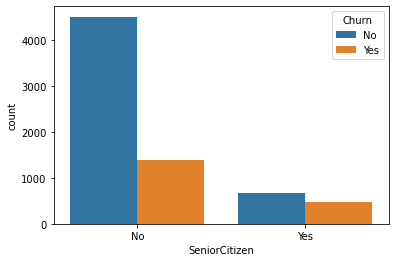

In [799]:
sns.countplot(x="SeniorCitizen",hue="Churn",data=df)


In [800]:
SC_Y=df[df.SeniorCitizen=="Yes"]["Churn"].value_counts(1)
SC_N=df[df.SeniorCitizen=="No"]["Churn"].value_counts(1)
print(SC_N)
print(SC_Y)

No     0.763938
Yes    0.236062
Name: Churn, dtype: float64
No     0.583187
Yes    0.416813
Name: Churn, dtype: float64



* It can be observed that the fraction of senior citizen is very less but most of the senior citizens churn approx(0.416813)

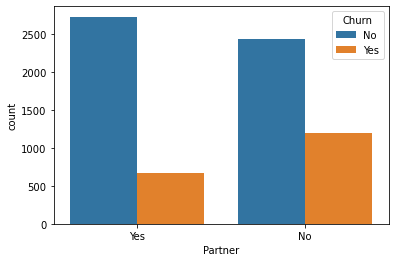

In [801]:
sns.countplot(x="Partner",hue="Churn",data=df)


In [802]:
Part_Y=df[df.Partner=="Yes"]["Churn"].value_counts(1)
Part_N=df[df.Partner=="No"]["Churn"].value_counts(1)
print("Partners")
print(Part_Y,"\n")
print(" Not Having Partners")
print(Part_N)

Partners
No     0.803351
Yes    0.196649
Name: Churn, dtype: float64 

 Not Having Partners
No     0.67042
Yes    0.32958
Name: Churn, dtype: float64


* Partner: Single customers are more likely to churn than customers with partners because their chruning rate is high (0.32958)

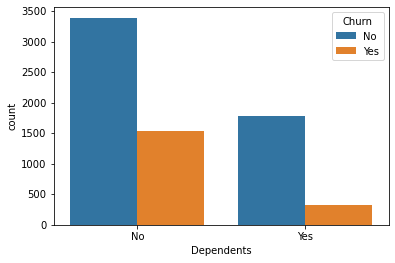

In [803]:
sns.countplot(x="Dependents",hue="Churn",data=df)


In [804]:
Dep_Y=df[df.Dependents=="Yes"]["Churn"].value_counts(1)
Dep_N=df[df.Dependents=="No"]["Churn"].value_counts(1)
print("Dependents")
print(Dep_Y,"\n")
print(" Not  Dependents")
print(Dep_N)

Dependents
No     0.845498
Yes    0.154502
Name: Churn, dtype: float64 

 Not  Dependents
No     0.687209
Yes    0.312791
Name: Churn, dtype: float64


* Dependents: Customers with dependents are less likely to churn than customers without any dependents.

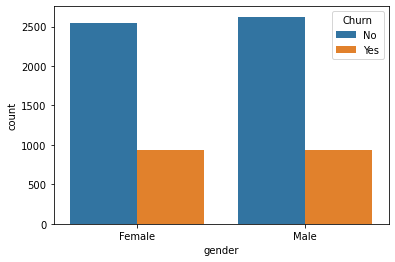

In [805]:
sns.countplot(x="gender",data=df,hue="Churn")

In [806]:
sex_F=df[df.gender=="Female"]["Churn"].value_counts(1)
sex_M=df[df.gender=="Male"]["Churn"].value_counts(1)

In [807]:
print("Female_Churning_Rate")
print(sex_F,"\n")
print(" Male_Churning_Rate")
print(sex_M)

Female_Churning_Rate
No     0.730791
Yes    0.269209
Name: Churn, dtype: float64 

 Male_Churning_Rate
No     0.738397
Yes    0.261603
Name: Churn, dtype: float64


* Churing rate in male and female is approximately same (~26%-27%)

In [808]:
# <!-- The variables group has only categorical variables. Most of them has three classes.

# For example, the customer can have 'DSL' internet, 'Fiber optic' internet, and 'no' internet service


# * DSl might be again a local network provider(sort of connection) that depends on Monthly Charges.

# *if the monthly charges are more then the customer's churning rate will also increase. -->

# Label Encoding

In [809]:
cat=df.select_dtypes(include="object")
cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [810]:
for i in cat:
    print(i)
    print(cat[i].value_counts())

gender
Male      3555
Female    3488
Name: gender, dtype: int64
SeniorCitizen
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
TechSupport
No                 

In [811]:
def object_to_int(df_feat):
    if df_feat.dtype=='object':
        df_feat= LabelEncoder().fit_transform(df_feat)
    return df_feat

In [812]:
dummy_cat=cat.apply(lambda x: object_to_int(x))

In [813]:
dummy_cat

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [814]:
dummy_cat.shape

(7043, 17)

In [815]:
dummy_cat.shape

(7043, 17)

# Statistical Testing

An assumption of few variables showing postive impact are true or not.

Does these variables have significant impact on churn.

Chi square Test to solve this assumption

The Chi-square test of independence determines whether there is a statistically significant relationship between categorical variables. It is a hypothesis test that answers the question—do the values of one categorical variable depend on the value of other categorical variables?

The Chi-square test of association evaluates relationships between categorical variables. Like any statistical hypothesis test, the Chi-square test has both a null hypothesis and an alternative hypothesis.

Null hypothesis: There are no relationships between the categorical variables. If you know the value of one variable, it does not help you predict the value of another variable.

Alternative hypothesis: There are relationships between the categorical variables. Knowing the value of one variable does help you predict the value of another variable

In [816]:
from scipy import stats

In [817]:
cat.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

# Statstical Test on a data set

In [818]:
df1=df.copy()

# Anova Test

In [819]:
x1 = []
x2 = []

# for i in list(cat_data.columns[:-1])+cat_cols:
#     teststats,pvalue,df,exp_freq = stats.chi2_contingency(pd.crosstab(data[i],data['y']))
#     x1.append(i)
#     x2.append(np.format_float_positional(pvalue))
for i in num: #       
    fstat,pvalue = stats.f_oneway(df1[df1['Churn'] == 'No'][i],df1[df1['Churn'] == 'Yes'][i])
    x1.append(i)
    x2.append(np.format_float_positional(pvalue))
stat_test = pd.DataFrame(x2,index=x1,columns=['Pvalue'])
stat_test['Significant'] = stat_test['Pvalue'].apply(lambda x: 'Yes' if float(x) < 0.05 else 'No') 
stat_test

,Pvalue,Significant
tenure,0.00000000000000000000000000000000000000000000...,Yes
MonthlyCharges,0.00000000000000000000000000000000000000000000...,Yes
TotalCharges,0.00000000000000000000000000000000000000000000...,Yes


# Chi-Squared Test

In [915]:
x3 = []
x4 = []

for i in(cat.columns):
    teststats,pvalue,dof,exp_freq = stats.chi2_contingency(pd.crosstab(df1[i],df1['Churn']))
    x3.append(i)
    x4.append(np.format_float_positional(pvalue))
stat_test_1 = pd.DataFrame(x4,index=x3,columns=['Pvalue'])
stat_test_1['Significant'] = stat_test_1['Pvalue'].apply(lambda x: 'Yes' if float(x) < 0.05 else 'No') 
stat_test_1

,Pvalue,Significant
gender,0.48657873605618596,No
SeniorCitizen,0.00000000000000000000000000000000000151006680...,Yes
Partner,0.00000000000000000000000000000000000213991134...,Yes
Dependents,0.00000000000000000000000000000000000000000049...,Yes
PhoneService,0.3387825358066928,No
MultipleLines,0.0034643829548773,Yes
InternetService,0.00000000000000000000000000000000000000000000...,Yes
OnlineSecurity,0.00000000000000000000000000000000000000000000...,Yes
OnlineBackup,0.00000000000000000000000000000000000000000000...,Yes
DeviceProtection,0.00000000000000000000000000000000000000000000...,Yes


In [821]:
stats_final=pd.concat([stat_test,stat_test_1])
stats_final


,Pvalue,Significant
tenure,0.00000000000000000000000000000000000000000000...,Yes
MonthlyCharges,0.00000000000000000000000000000000000000000000...,Yes
TotalCharges,0.00000000000000000000000000000000000000000000...,Yes
gender,0.48657873605618596,No
SeniorCitizen,0.00000000000000000000000000000000000151006680...,Yes
Partner,0.00000000000000000000000000000000000213991134...,Yes
Dependents,0.00000000000000000000000000000000000000000049...,Yes
PhoneService,0.3387825358066928,No
MultipleLines,0.0034643829548773,Yes
InternetService,0.00000000000000000000000000000000000000000000...,Yes


In [822]:
num=df.select_dtypes(exclude="object")
num.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [823]:
dummy_cat.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0


In [824]:
df_churn=pd.concat([dummy_cat,num],axis=1)

In [825]:
df_churn.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.50


In [826]:
df_churn.shape

(7043, 20)

# Train_Test_Split

In [827]:
from sklearn.model_selection import train_test_split


x =df_churn.drop(["Churn"],axis=1)
y = df_churn["Churn"]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30,random_state=3)
print("Xtrain Shape:", xtrain.shape)
print("Xtest Shape:", xtest.shape)
print("Ytrain Shape:", ytrain.shape)
print("Ytest Shape:", ytest.shape)

Xtrain Shape: (4930, 19)
Xtest Shape: (2113, 19)
Ytrain Shape: (4930,)
Ytest Shape: (2113,)


In [828]:
df.skew() # before encoding 

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963789
dtype: float64

In [829]:
df_churn.skew() # after encoding 

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
Churn               1.063031
tenure              0.239540
MonthlyCharges     -0.220524
TotalCharges        0.963789
dtype: float64

# SCaling 

In [830]:
from sklearn.preprocessing import StandardScaler

In [831]:
ss=StandardScaler()
df_churn
# df_scaled=pd.DataFrame(ss.fit_transform(df_churn_copy),columns=df_churn_copy.columns)
# df_scaled.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.50
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,2,53.85,108.15
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,45,42.30,1840.75
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0,24,84.80,1990.50
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0,72,103.20,7362.90
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0,11,29.60,346.45
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1,4,74.40,306.60


# MODEL IMPLIMENTATION 

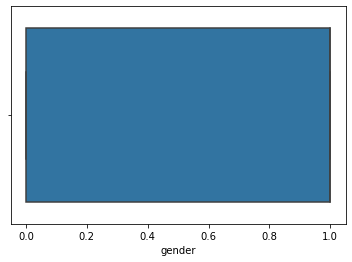

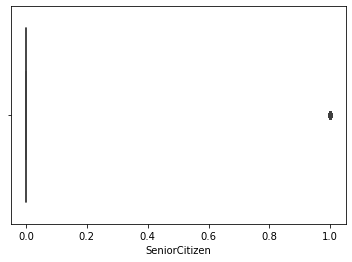

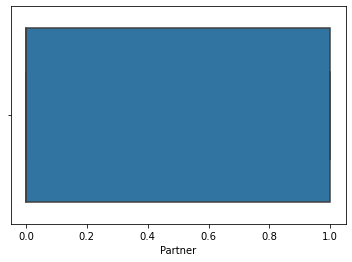

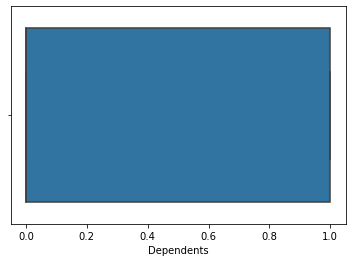

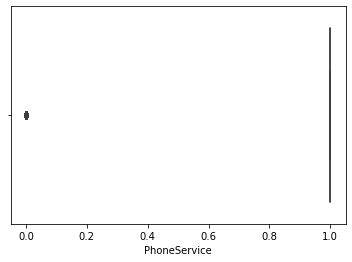

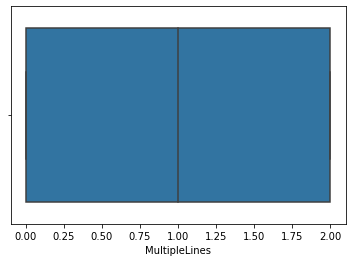

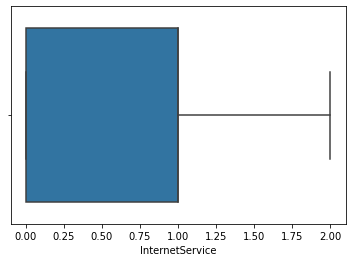

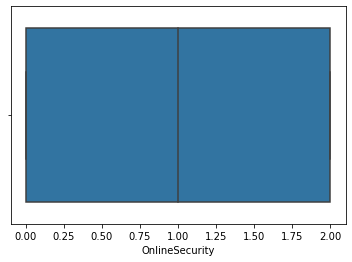

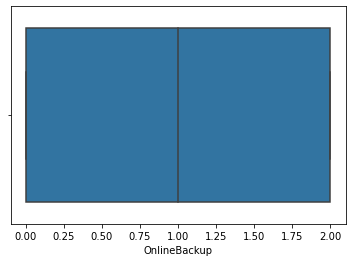

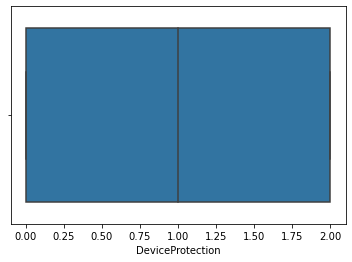

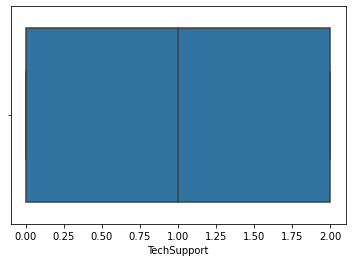

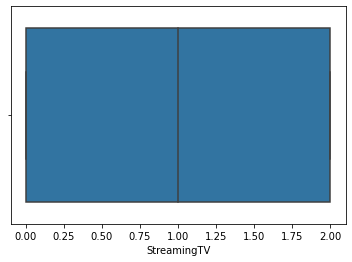

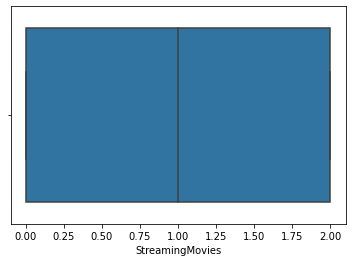

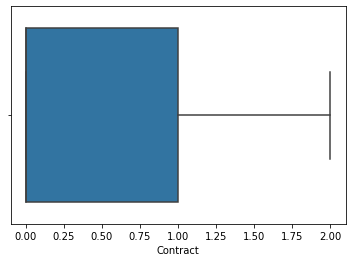

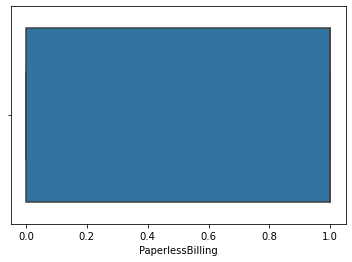

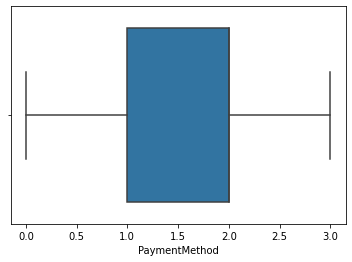

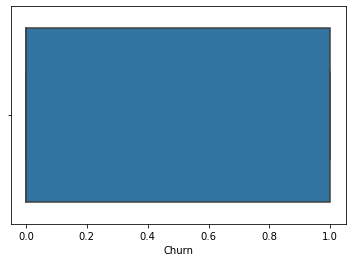

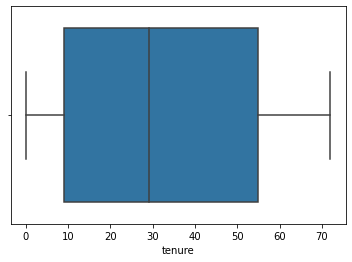

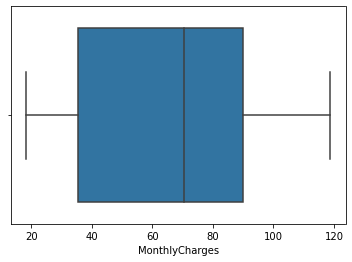

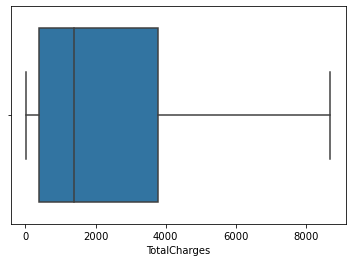

In [832]:
# plt.figure(figsize=[8,6])
for i in df_churn:
    sns.boxplot(df_churn[i])
    plt.show() 

# LogisticRegression

In [833]:
#Basic Linear Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
X=df_churn.drop('Churn',axis=1)
y=df_churn[['Churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .20,random_state=10)
lc = LogisticRegression()
lc.fit(X_train,y_train)
print("Training R2")
print(lc.score(X_train,y_train))
print("Testing R2")
print(lc.score(X_test,y_test))

Training R2
0.8008519701810437
Testing R2
0.8090844570617459


# Scaled Logistic Regression

In [834]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
X=df_churn.drop('Churn',axis=1)
y=df_churn[['Churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .20,random_state=10)
sc=StandardScaler()
scaledXtrain = sc.fit_transform(X_train)
scaledXtest = sc.transform(X_test)
lr = LogisticRegression()
lr.fit(scaledXtrain,y_train)
print("Training R2")
print(lr.score(scaledXtrain,y_train))
print("Testing R2")
print(lr.score(scaledXtest,y_test))

Training R2
0.8029818956336529
Testing R2
0.8062455642299503


In [835]:
# from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# lr_pred = lr.predict(X_test)
# lr_pred_round  = round(accuracy_score(y_test, lr_pred)*100, 2)
# print(lr_pred_round)  

# pipe_pred = pipe.predict(X_test)
# pipe_pred_round  = round(accuracy_score(y_test, pipe_pred)*100, 2)
# print(pipe_pred_round)

# gb_pred = gb.predict(X_test)
# gb_pred_round  = round(accuracy_score(y_test, gb_pred)*100, 2)
# print(gb_pred_round)

# model_rf_pred = model_rf.predict(X_test)
# model_rf_pred_round  = round(accuracy_score(y_test, model_rf_pred)*100, 2)
# print(model_rf_pred_round)

# knn_pred = knn.predict(X_test)
# knn_pred_round  = round(accuracy_score(y_test, knn_pred)*100, 2)
# print(knn_pred_round)

# Gnb_pred = Gnb.predict(X_test)
# Gnb_pred_round  = round(accuracy_score(y_test, Gnb_pred)*100, 2)
# print(Gnb_pred_round)

# Ac_pred = Ac.predict(X_test)
# Ac_pred_round  = round(accuracy_score(y_test, Ac_pred)*100, 2)
# print(Ac_pred_round)


In [836]:

# from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# lr_pred = lr.predict(X_test)
# lr_pred_round  = round(accuracy_score(y_test, lr_pred)*100, 2)
# print(lr_pred_round)  

# pipe_pred = pipe.predict(X_test)
# pipe_pred_round  = round(accuracy_score(y_test, pipe_pred)*100, 2)
# print(pipe_pred_round)

# gb_pred = gb.predict(X_test)
# gb_pred_round  = round(accuracy_score(y_test, gb_pred)*100, 2)
# print(gb_pred_round)

# model_rf_pred = model_rf.predict(X_test)
# model_rf_pred_round  = round(accuracy_score(y_test, model_rf_pred)*100, 2)
# print(model_rf_pred_round)

# knn_pred = knn.predict(X_test)
# knn_pred_round  = round(accuracy_score(y_test, knn_pred)*100, 2)
# print(knn_pred_round)

# Gnb_pred = Gnb.predict(X_test)
# Gnb_pred_round  = round(accuracy_score(y_test, Gnb_pred)*100, 2)
# print(Gnb_pred_round)

# Ac_pred = Ac.predict(X_test)
# Ac_pred_round  = round(accuracy_score(y_test, Ac_pred)*100, 2)
# print(Ac_pred_round)


















# models = pd.DataFrame({
#     'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'KNeighbours', 'Naive-Bayes', 'AdaBoost'],
#     'Accuracy_score' :[lr_pred_round, pipe_pred_round,model_rf_pred_round, gb_pred_round,knn_pred_round,Gnb_pred_round,Ac_pred_round ]
# })
# models
# sns.barplot(x='Accuracy_score', y='Model', data=models)

# models.sort_values(by='Accuracy_score', ascending=False)
# models

# Decision Tree 

In [837]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
X=df_churn.drop('Churn',axis=1)
y=df_churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("pt",PowerTransformer()),
("lr", DecisionTreeClassifier(max_depth=25,random_state=10)),
))
pipe.fit(X_train,y_train)
print("Training R2")
print(pipe.score(X_train,y_train))
print("Testing R2")
print(pipe.score(X_test,y_test))
scoresdt = cross_val_score(pipe,X_train,y_train,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9955626553070642
Testing R2
0.723207948899929
[0.70567376 0.76950355 0.70390071 0.71453901 0.72113677 0.71936057
 0.73357016 0.70159858 0.71580817 0.74600355]
Average R2
0.7231094818789917


# ADABOOSTING

In [838]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import PowerTransformer
X=df_churn.drop('Churn',axis=1)
y=df_churn[['Churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

pt=PowerTransformer()
pt_Xtrain=pt.fit_transform(X_train)
pt_Xtest=pt.transform(X_test)
Ac = AdaBoostClassifier(n_estimators=100,random_state=10)
Ac.fit(pt_Xtrain,y_train)
print("Training Accuracy")
print(Ac.score(pt_Xtrain,y_train))
print("Testing Accuracy")
print(Ac.score(pt_Xtest,y_test))
predicted = Ac.predict(pt_Xtest)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
print(precision_score(y_test,predicted))
print(recall_score(y_test,predicted))
print(f1_score(y_test,predicted))

Training Accuracy
0.8134540291089812
Testing Accuracy
0.7991483321504613
[[932  94]
 [189 194]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1026
           1       0.67      0.51      0.58       383

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

0.6736111111111112
0.5065274151436031
0.578241430700447


# Gradient Boosting

In [839]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report,precision_score,recall_score,f1_score
X =df_churn.drop(["Churn"],axis=1)
y = df_churn["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
gb = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=10)
gb.fit(X_train,y_train)
print("Training Accuracy")
print(gb.score(X_train,y_train))
print("Testing Accuracy")
print(gb.score(X_test,y_test))
predicted = gb.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
print(precision_score(y_test,predicted))
print(recall_score(y_test,predicted))
print(f1_score(y_test,predicted))

Training Accuracy
0.822861199858005
Testing Accuracy
0.8147622427253371
[[947 114]
 [147 201]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1061
           1       0.64      0.58      0.61       348

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.81      0.81      0.81      1409

0.638095238095238
0.5775862068965517
0.6063348416289593


# random forest 

In [840]:
from sklearn.ensemble import RandomForestClassifier
X =df_churn.drop(["Churn"],axis=1)
y = df_churn["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)

from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
X=df_churn.drop('Churn',axis=1)
y=df_churn[['Churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
pt = PowerTransformer()
powertrain = pt.fit_transform(X_train)
powertest = pt.transform(X_test)
model_rf = RandomForestClassifier(n_estimators=100,random_state =50)
model_rf.fit(powertrain,y_train)
print("Training Accuracy")
print(model_rf.score(powertrain,y_train))
print("Testing Accuracy")
print(model_rf.score(powertest,y_test))
predicted = model_rf.predict(powertest)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

Training Accuracy
0.9976925807596734
Testing Accuracy
0.8034066713981547
[[947 116]
 [161 185]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1063
           1       0.61      0.53      0.57       346

    accuracy                           0.80      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.80      0.80      0.80      1409



# KNeighborsClassifier

In [841]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
X=df_churn.drop('Churn',axis=1)
y=df_churn[['Churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
pt = PowerTransformer()
powertrain = pt.fit_transform(X_train)
powertest = pt.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(powertrain,y_train)
print("Training Accuracy")
print(knn.score(powertrain,y_train))
print("Testing Accuracy")
print(knn.score(powertest,y_test))
predicted = knn.predict(powertest)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

Training Accuracy
0.8611998580049698
Testing Accuracy
0.759403832505323
[[879 184]
 [155 191]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1063
           1       0.51      0.55      0.53       346

    accuracy                           0.76      1409
   macro avg       0.68      0.69      0.68      1409
weighted avg       0.77      0.76      0.76      1409



# GaussianNB

In [842]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
X=df_churn.drop('Churn',axis=1)
y=df_churn[['Churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
pt = PowerTransformer()
powertrain = pt.fit_transform(X_train)
powertest = pt.transform(X_test)
Gnb = GaussianNB()
Gnb.fit(powertrain,y_train)
print("Training Accuracy")
print(Gnb.score(powertrain,y_train))
print("Testing Accuracy")
print(Gnb.score(powertest,y_test))
predicted = Gnb.predict(powertest)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

Training Accuracy
0.7563010294639687
Testing Accuracy
0.7629524485450674
[[812 251]
 [ 83 263]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1063
           1       0.51      0.76      0.61       346

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.81      0.76      0.78      1409



# roc_curve, auc

In [843]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc
probas1_ = lr.fit(scaledXtrain,y_train).predict_proba(X_test)
probas2_ = pipe.fit(X_train, y_train).predict_proba(X_test) 
probas3_ = Ac.fit(X_train, y_train).predict_proba(X_test) 
probas4_ = gb.fit(X_train, y_train).predict_proba(X_test) 
probas5_ = model_rf.fit(X_train, y_train).predict_proba(X_test) 
probas6_ = knn.fit(X_train, y_train).predict_proba(X_test)
probas7_ = Gnb.fit(X_train, y_train).predict_proba(X_test) 



In [844]:
# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.693359


In [845]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.665379


In [846]:
fpr3, tpr3, thresholds3 = roc_curve(y_test, probas3_[:, 1])
roc_auc3 = auc(fpr3, tpr3)
print("Area under the ROC curve : %f" % roc_auc3)

Area under the ROC curve : 0.858318


In [847]:
fpr4, tpr4, thresholds4 = roc_curve(y_test, probas4_[:, 1])
roc_auc4 = auc(fpr4, tpr4)
print("Area under the ROC curve : %f" % roc_auc4)

Area under the ROC curve : 0.855211


In [848]:
fpr5, tpr5, thresholds5 = roc_curve(y_test, probas5_[:, 1])
roc_auc5 = auc(fpr5, tpr5)
print("Area under the ROC curve : %f" % roc_auc5)

Area under the ROC curve : 0.844869


In [849]:
fpr6, tpr6, thresholds6 = roc_curve(y_test, probas6_[:, 1])
roc_auc6 = auc(fpr6, tpr6)
print("Area under the ROC curve : %f" % roc_auc6)

Area under the ROC curve : 0.725228


In [850]:
fpr7, tpr7, thresholds7 = roc_curve(y_test, probas7_[:, 1])
roc_auc7 = auc(fpr7, tpr7)
print("Area under the ROC curve : %f" % roc_auc7)

Area under the ROC curve : 0.835055


<Figure size 432x288 with 0 Axes>

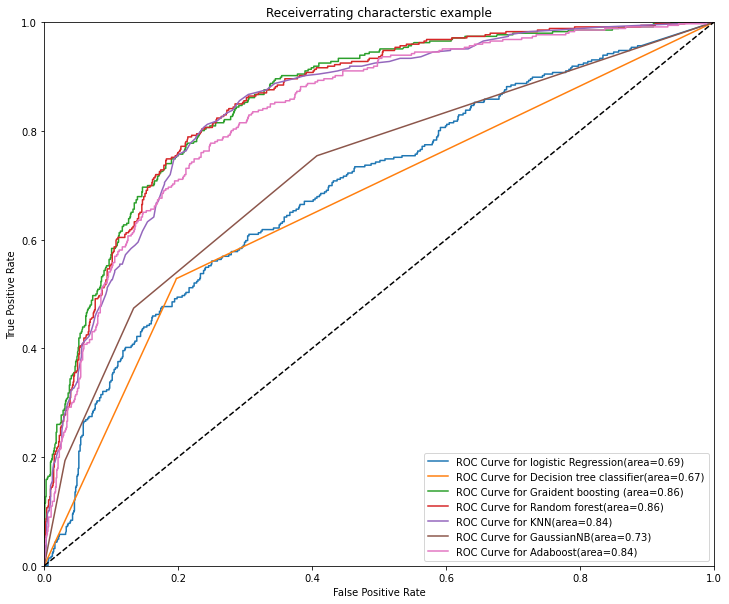

In [851]:
import pylab as pl
pl.clf()
pl.figure(figsize=[12,10])
pl.plot(fpr1,tpr1,label="ROC Curve for logistic Regression(area=%0.2f)"% roc_auc1)
pl.plot(fpr2,tpr2,label="ROC Curve for Decision tree classifier(area=%0.2f)"%roc_auc2)
pl.plot(fpr3,tpr3,label="ROC Curve for Graident boosting (area=%0.2f)"%roc_auc3)
pl.plot(fpr4,tpr4,label="ROC Curve for Random forest(area=%0.2f)"%roc_auc4)
pl.plot(fpr5,tpr5,label="ROC Curve for KNN(area=%0.2f)"%roc_auc5)
pl.plot(fpr6,tpr6,label="ROC Curve for GaussianNB(area=%0.2f)"%roc_auc6)
pl.plot(fpr7,tpr7,label="ROC Curve for Adaboost(area=%0.2f)"%roc_auc7)
pl.plot([0,1],[0,1],'k--')
pl.xlim([0.0,1.0])
pl.ylim([0.0,1.0])
pl.xlabel("False Positive Rate")
pl.ylabel("True Positive Rate")
pl.title("Receiverrating characterstic example")
pl.legend(loc='lower right')
pl.show()

# Feature Importance

In [897]:
importances = gb.feature_importances_
features_important = pd.DataFrame({"Features":xr_train1.columns,"Importances":importances})
features_important.sort_values(by='Importances',ascending=False)

,Features,Importances
13,Contract,0.413837
16,tenure,0.140712
17,MonthlyCharges,0.132152
18,TotalCharges,0.084625
7,OnlineSecurity,0.081928
10,TechSupport,0.054556
6,InternetService,0.017800
15,PaymentMethod,0.016885
14,PaperlessBilling,0.013844
8,OnlineBackup,0.011854


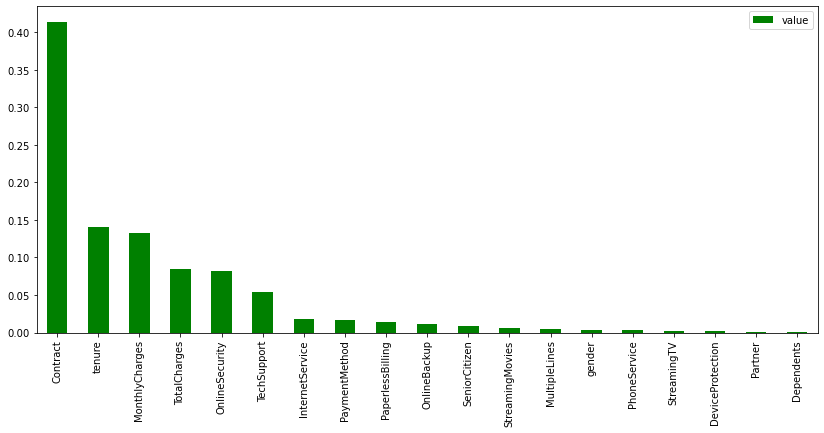

In [922]:
pd.DataFrame(gb.feature_importances_,index=X_train.columns,columns=['value']).sort_values(by='value',ascending=False).plot(kind='bar',figsize=(14,6),color="green")

# ACCURACY SCORE BY Different models

In [852]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
lr_pred = lr.predict(X_test)
lr_pred_round  = round(accuracy_score(y_test, lr_pred)*100, 2)
print(lr_pred_round)  

pipe_pred = pipe.predict(X_test)
pipe_pred_round  = round(accuracy_score(y_test, pipe_pred)*100, 2)
print(pipe_pred_round)

gb_pred = gb.predict(X_test)
gb_pred_round  = round(accuracy_score(y_test, gb_pred)*100, 2)
print(gb_pred_round)

model_rf_pred = model_rf.predict(X_test)
model_rf_pred_round  = round(accuracy_score(y_test, model_rf_pred)*100, 2)
print(model_rf_pred_round)

knn_pred = knn.predict(X_test)
knn_pred_round  = round(accuracy_score(y_test, knn_pred)*100, 2)
print(knn_pred_round)

Gnb_pred = Gnb.predict(X_test)
Gnb_pred_round  = round(accuracy_score(y_test, Gnb_pred)*100, 2)
print(Gnb_pred_round)

Ac_pred = Ac.predict(X_test)
Ac_pred_round  = round(accuracy_score(y_test, Ac_pred)*100, 2)
print(Ac_pred_round)

75.44
73.53
81.48
80.84
77.0
75.73
81.76


,Model,Accuracy_score
0,Logistic Regression,75.44
1,Decision Tree,73.53
2,Random Forest,80.84
3,Gradient Boost,81.48
4,KNeighbours,77.00
5,Naive-Bayes,75.73
6,AdaBoost,81.76


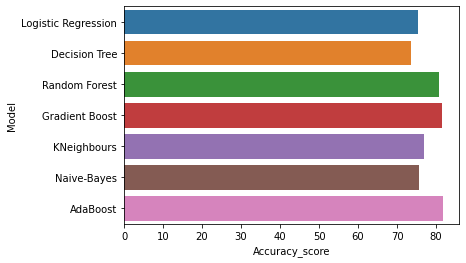

In [853]:

models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'KNeighbours', 'Naive-Bayes', 'AdaBoost'],
    'Accuracy_score' :[lr_pred_round, pipe_pred_round,model_rf_pred_round, gb_pred_round,knn_pred_round,Gnb_pred_round,Ac_pred_round ]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)
models

* Above graph shows the performance and comparsion of different models used in this notebook.

In [854]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.preprocessing import PowerTransformer
# X =X_resampled1
# y = y_resampled1

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
# pt=PowerTransformer()
# pt_Xtrain=pt.fit_transform(X_train)
# pt_Xtest=pt.transform(X_test)
# gb = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=10)
# gb.fit(pt_Xtrain,y_train)
# print("Training Accuracy")
# print(gb.score(pt_Xtrain,y_train))
# print("Testing Accuracy")
# print(gb.score(pt_Xtest,y_test))
# predicted = gb.predict(pt_Xtest)
# print(confusion_matrix(y_test,predicted))
# print(classification_report(y_test,predicted))
# print(precision_score(y_test,predicted))
# print(recall_score(y_test,predicted))
# print(f1_score(y_test,predicted))

# SMOTENN MODEL 

In [855]:

from imblearn.combine import SMOTEENN
X=df_churn.drop('Churn',axis=1)
y=df_churn[['Churn']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X,y)

In [856]:
X_resampled1
y_resampled1

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
5931,1
5932,1
5933,1
5934,1


# DECISION TREE SMOTENN 

In [857]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,f1_score
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)
dtc_smote=DecisionTreeClassifier(max_depth=20,random_state=10)
dtc_smote.fit(xr_train1,yr_train1)
print(dtc_smote.score(xr_train1,yr_train1))

yr_predict1 = dtc_smote.predict(xr_test1)
model_score_r1 = dtc_smote.score(xr_test1, yr_test1)
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))
print(metrics.confusion_matrix(yr_test1, yr_predict1))

1.0
0.9326599326599326
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       529
           1       0.93      0.95      0.94       659

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188

[[484  45]
 [ 35 624]]


In [923]:
from sklearn.model_selection import GridSearchCV
tune=[{"max_depth":(1,100,2)}]
dtc_smote_grid = DecisionTreeClassifier(max_depth=25,random_state=10)
search_1=GridSearchCV(estimator=dtc_smote_grid,param_grid=tune,scoring="recall")
search_1.fit(xr_train1,yr_train1)
print(search_1.score(xr_train1,yr_train1))
print(search_1.best_score_)

print(search_1.best_params_)

0.9582066869300911
0.9581987142949908
{'max_depth': 1}


In [859]:
# RANDOM FOREST 

In [860]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf_smote.fit(xr_train1,yr_train1)
print(model_rf_smote.score(xr_train1,yr_train1))

yr_predict1 = model_rf_smote.predict(xr_test1)
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))
print(metrics.confusion_matrix(yr_test1, yr_predict1))


0.9422914911541702
0.9267676767676768
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       553
           1       0.92      0.95      0.93       635

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188

[[499  54]
 [ 33 602]]


In [861]:
from sklearn.model_selection import GridSearchCV

tune=[{"n_estimators":(1,20,2),"criterion":("entropy","ginni")}]
rf=RandomForestClassifier(random_state=10)
search_2=GridSearchCV(estimator=rf,param_grid=tune,scoring="recall")
search_2.fit(xr_train1,yr_train1)
print(search_2.score(xr_train1,yr_train1))
print(search_2.best_score_)

print(search_2.best_params_)

0.9988649262202043
0.9564845047831815
{'criterion': 'entropy', 'n_estimators': 20}


In [862]:
# GRADIENT BOOSTING CLASSIFIER

In [863]:
from sklearn.ensemble import GradientBoostingClassifier

xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)
gb_smote = GradientBoostingClassifier(n_estimators=80,max_depth=3,random_state=10)

gb_smote.fit(xr_train1,yr_train1)
print(gb_smote.score(xr_train1,yr_train1))

yr_predict1 = gb_smote.predict(xr_test1)
model_score_r1 = gb_smote.score(xr_test1, yr_test1)
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))
print(metrics.confusion_matrix(yr_test1, yr_predict1))


0.9540859309182814
0.9494949494949495
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       525
           1       0.94      0.97      0.96       663

    accuracy                           0.95      1188
   macro avg       0.95      0.95      0.95      1188
weighted avg       0.95      0.95      0.95      1188

[[485  40]
 [ 20 643]]


In [864]:
from sklearn.model_selection import GridSearchCV
tune=[{"n_estimators":(1,100,2)}]
gb_smote = GradientBoostingClassifier(n_estimators=80,max_depth=3,random_state=10)
search_3=GridSearchCV(estimator=gb_smote,param_grid=tune,scoring="recall")
search_3.fit(xr_train1,yr_train1)
print(search_3.score(xr_train1,yr_train1))
print(search_3.best_score_)

print(search_3.best_params_)

0.994263862332696
0.9938814531548757
{'n_estimators': 1}


In [865]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)
Adb_smote = AdaBoostClassifier(n_estimators=100,random_state=10)

Adb_smote.fit(xr_train1,yr_train1)
print(Adb_smote.score(xr_train1,yr_train1))

yr_predict1 = Adb_smote.predict(xr_test1)
model_score_r1 = Adb_smote.score(xr_test1, yr_test1)
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))
print(metrics.confusion_matrix(yr_test1, yr_predict1))


0.9492417860151643
0.946969696969697
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       538
           1       0.94      0.96      0.95       650

    accuracy                           0.95      1188
   macro avg       0.95      0.95      0.95      1188
weighted avg       0.95      0.95      0.95      1188

[[498  40]
 [ 23 627]]


In [866]:
from sklearn.model_selection import GridSearchCV
tune=[{"n_estimators":(1,100,2)}]
Ac_smote = AdaBoostClassifier(n_estimators=100,random_state=10)
search_4=GridSearchCV(estimator=Ac_smote,param_grid=tune,scoring="recall")
search_4.fit(xr_train1,yr_train1)
print(search_4.score(xr_train1,yr_train1))
print(search_4.best_score_)

print(search_4.best_params_)

0.9623287671232876
0.9596545355784899
{'n_estimators': 100}


In [902]:
from sklearn.neighbors import KNeighborsClassifier

xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)
knn_smote = KNeighborsClassifier(n_neighbors=3)

knn_smote.fit(xr_train1,yr_train1)
print(knn_smote.score(xr_train1,yr_train1))

yr_predict11 = knn_smote.predict(xr_test1)
model_score_r1 = knn_smote.score(xr_test1, yr_test1)
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict11))

print(metrics.confusion_matrix(yr_test1, yr_predict11))


0.991575400168492
0.9739057239057239
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       542
           1       0.96      0.99      0.98       646

    accuracy                           0.97      1188
   macro avg       0.98      0.97      0.97      1188
weighted avg       0.97      0.97      0.97      1188

[[517  25]
 [  6 640]]


In [868]:
from sklearn.model_selection import GridSearchCV
tune=[{"n_neighbors":(1,10,2)}]
knn_smote_grid = KNeighborsClassifier(n_neighbors=3)
search_5=GridSearchCV(estimator=knn_smote_grid,param_grid=tune,scoring="recall")
search_5.fit(xr_train1,yr_train1)
print(search_5.score(xr_train1,yr_train1))
print(search_5.best_score_)

print(search_5.best_params_)

1.0
0.9901407337128398
{'n_neighbors': 1}


Area under the ROC curve : 0.989835


<Figure size 432x288 with 0 Axes>

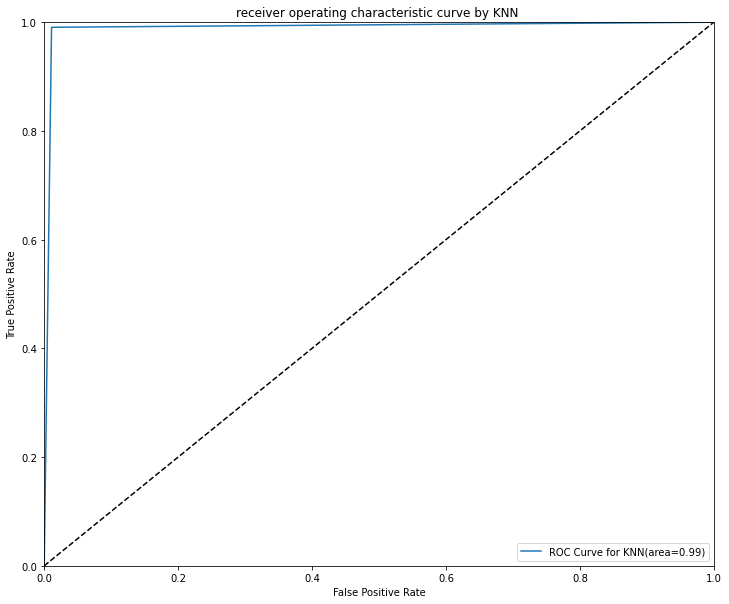

In [869]:
probas5_ = search_5.fit(xr_train1,yr_train1).predict_proba(xr_test1) 
fpr5, tpr5, thresholds5 = roc_curve(yr_test1, probas5_[:, 1])
roc_auc5 = auc(fpr5, tpr5)
print("Area under the ROC curve : %f" % roc_auc5)
import pylab as pl
pl.clf()
pl.figure(figsize=[12,10])
pl.plot(fpr5,tpr5,label="ROC Curve for KNN(area=%0.2f)"%roc_auc5)
pl.plot([0,1],[0,1],'k--')
pl.xlim([0.0,1.0])
pl.ylim([0.0,1.0])
pl.xlabel("False Positive Rate")
pl.ylabel("True Positive Rate")
pl.title("receiver operating characteristic curve by KNN ")
pl.legend(loc='lower right')
pl.show()


In [870]:


xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)
Gnb_smote = GaussianNB()

Gnb_smote.fit(xr_train1,yr_train1)
print(Gnb_smote.score(xr_train1,yr_train1))

yr_predict1 = Gnb_smote.predict(xr_test1)
model_score_r1 = Gnb_smote.score(xr_test1, yr_test1)
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))
print(metrics.confusion_matrix(yr_test1, yr_predict1))


0.8961668070766639
0.8897306397306397
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       543
           1       0.90      0.89      0.90       645

    accuracy                           0.89      1188
   macro avg       0.89      0.89      0.89      1188
weighted avg       0.89      0.89      0.89      1188

[[480  63]
 [ 68 577]]


# ROC CURVE SMOTENN GRID SEARCH

In [871]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc
probas1_ = search_1.fit(xr_train1,yr_train1).predict_proba(xr_test1)
probas2_ = search_2.fit(xr_train1,yr_train1).predict_proba(xr_test1) 
probas3_ = search_3.fit(xr_train1,yr_train1).predict_proba(xr_test1) 
probas4_ = search_4.fit(xr_train1,yr_train1).predict_proba(xr_test1) 
probas5_ = search_5.fit(xr_train1,yr_train1).predict_proba(xr_test1) 




In [872]:
# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(yr_test1, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)
fpr2, tpr2, thresholds2 = roc_curve(yr_test1, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_auc2)
fpr3, tpr3, thresholds3 = roc_curve(yr_test1, probas3_[:, 1])
roc_auc3 = auc(fpr3, tpr3)
print("Area under the ROC curve : %f" % roc_auc3)
fpr4, tpr4, thresholds4 = roc_curve(yr_test1, probas4_[:, 1])
roc_auc4 = auc(fpr4, tpr4)
print("Area under the ROC curve : %f" % roc_auc4)
fpr5, tpr5, thresholds5 = roc_curve(yr_test1, probas5_[:, 1])
roc_auc5 = auc(fpr5, tpr5)
print("Area under the ROC curve : %f" % roc_auc5)


Area under the ROC curve : 0.839642
Area under the ROC curve : 0.986592
Area under the ROC curve : 0.941958
Area under the ROC curve : 0.985924
Area under the ROC curve : 0.981053


<Figure size 432x288 with 0 Axes>

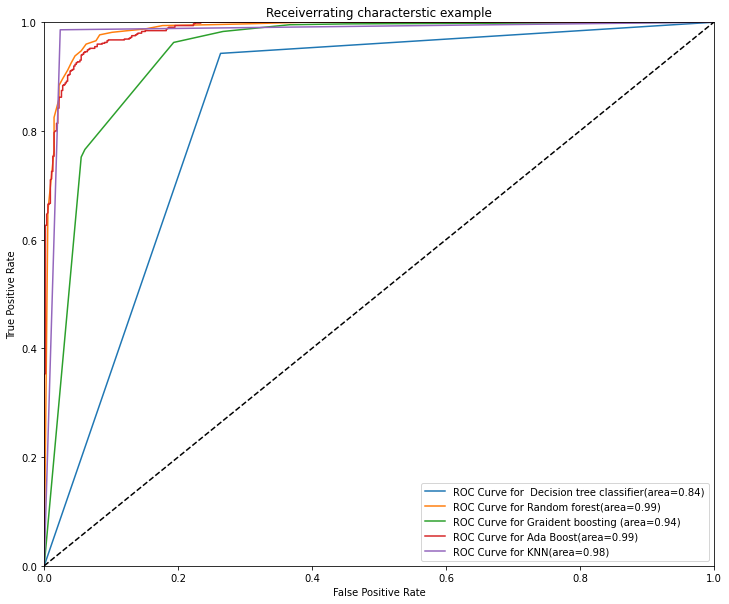

In [873]:
import pylab as pl
pl.clf()
pl.figure(figsize=[12,10])
pl.plot(fpr1,tpr1,label="ROC Curve for  Decision tree classifier(area=%0.2f)"% roc_auc1)
pl.plot(fpr2,tpr2,label="ROC Curve for Random forest(area=%0.2f)"%roc_auc2)
pl.plot(fpr3,tpr3,label="ROC Curve for Graident boosting (area=%0.2f)"%roc_auc3)
pl.plot(fpr4,tpr4,label="ROC Curve for Ada Boost(area=%0.2f)"%roc_auc4)
pl.plot(fpr5,tpr5,label="ROC Curve for KNN(area=%0.2f)"%roc_auc5)

pl.plot([0,1],[0,1],'k--')
pl.xlim([0.0,1.0])
pl.ylim([0.0,1.0])
pl.xlabel("False Positive Rate")
pl.ylabel("True Positive Rate")
pl.title("Receiverrating characterstic example")
pl.legend(loc='lower right')
pl.show()

# ACCURACY OF MODELS AFTER BALANCING THE DATA 

In [874]:

search1_pred = search_1.predict(xr_test1)
search1_pred_acc  = round(accuracy_score(yr_test1, search1_pred)*100, 2)
print(search1_pred_acc)  
# print(classification_report(yr_test1, search1_pred))

search2_pred = search_2.predict(xr_test1)
search2_pred_acc  = round(accuracy_score(yr_test1, search2_pred)*100, 2)
print(search2_pred_acc)  
# print(classification_report(yr_test1, search1_pred))

search3_pred = search_3.predict(xr_test1)
search3_pred_acc  = round(accuracy_score(yr_test1, search3_pred)*100, 2)
print(search3_pred_acc)  
# print(classification_report(yr_test1, search1_pred))

search4_pred = search_4.predict(xr_test1)
search4_pred_acc  = round(accuracy_score(yr_test1, search4_pred)*100, 2)
print(search4_pred_acc)  
# print(classification_report(yr_test1, search1_pred))

search5_pred = search_5.predict(xr_test1)
search5_pred_acc  = round(accuracy_score(yr_test1, search5_pred)*100, 2)
print(search5_pred_acc)  
# print(classification_report(yr_test1, search1_pred))


84.85
94.61
79.21
94.02
98.15


,Model,Accuracy_score
0,Decision Tree,84.85
1,Random Forest,94.61
2,Gradient Boost,79.21
3,AdaBoost,94.02
4,KNeighbours,98.15


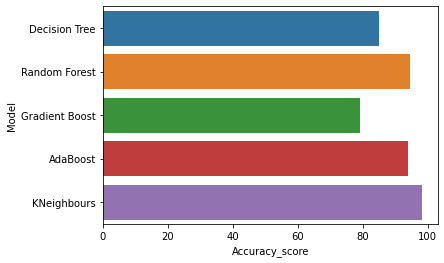

In [875]:

models = pd.DataFrame({
    'Model':[ 'Decision Tree', 'Random Forest', 'Gradient Boost', 'AdaBoost','KNeighbours' ],
    'Accuracy_score' :[search1_pred_acc, search2_pred_acc,search3_pred_acc, search4_pred_acc,search5_pred_acc]})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)
models

# CONFUSION MATRIX OF KNN

Text(33.0, 0.5, 'Truth (Actual Values)')

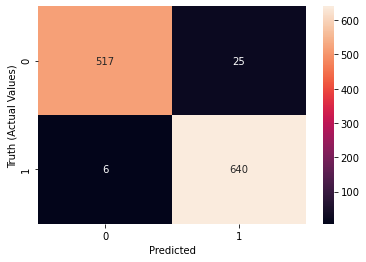

In [903]:
# sns.heatmap(metrics.confusion_matrix(yr_test1, yr_predict1),fmt="d",annot=True)
sns.heatmap(metrics.confusion_matrix(yr_test1, yr_predict11),fmt="d",annot=True)
# metrics.confusion_matrix(yr_test1, yr_predict1)
plt.xlabel('Predicted')
plt.ylabel('Truth (Actual Values)')

#  Score card of classification model 

In [904]:
models = []
models.append(['Decision Tree ',DecisionTreeClassifier(max_depth=1,random_state=10)])
models.append(['RandomForest',RandomForestClassifier(n_estimators=20, criterion='entropy', random_state = 10)])
models.append(['Gradient Boosting',GradientBoostingClassifier(n_estimators=1,max_depth=3,random_state=10)])
models.append(['AdaBoosting ', AdaBoostClassifier(n_estimators=1,random_state=10)])
models.append(['KNN ', KNeighborsClassifier(n_neighbors=3)])

In [905]:

from sklearn.metrics import roc_curve,roc_auc_score,f1_score,confusion_matrix

In [906]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(xr_train1,yr_train1)
    y_pred = model.predict(xr_test1)
    y_train_pred = model.predict(xr_train1)
    cm = confusion_matrix(yr_test1,y_pred)
    accuracies = cross_val_score(estimator= model, X = xr_train1,y = yr_train1, cv=10)
    
    roc = roc_auc_score(yr_test1,y_pred)
    precision = precision_score(yr_test1,y_pred)
    recall = recall_score(yr_test1,y_pred)
    f1 = f1_score(yr_test1,y_pred)
    print(models[m][0],':')
    print(cm)
    print('')
    print('Train Accuracy Score: ',accuracy_score(yr_train1,y_train_pred))
    print('')
    print('Test Accuracy Score: ',accuracy_score(yr_test1,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('')
    print(classification_report(yr_test1, y_pred)) 
    print('-'*40)
    print('')
    
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(yr_train1,y_train_pred)*100)
    lst_2.append(accuracy_score(yr_test1,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

    


Decision Tree  :
[[410 132]
 [ 34 612]]

Train Accuracy Score:  0.8580454928390902

Test Accuracy Score:  0.8602693602693603

K-Fold Validation Mean Accuracy: 85.80 %

Standard Deviation: 1.73 %

ROC AUC Score: 0.85 %

Precision: 0.82 %

Recall: 0.95 %

F1 Score: 0.88 %

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       542
           1       0.82      0.95      0.88       646

    accuracy                           0.86      1188
   macro avg       0.87      0.85      0.86      1188
weighted avg       0.87      0.86      0.86      1188

----------------------------------------

RandomForest :
[[509  33]
 [ 20 626]]

Train Accuracy Score:  0.9993681550126369

Test Accuracy Score:  0.9553872053872053

K-Fold Validation Mean Accuracy: 95.03 %

Standard Deviation: 0.48 %

ROC AUC Score: 0.95 %

Precision: 0.95 %

Recall: 0.97 %

F1 Score: 0.96 %

              precision    recall  f1-score   support

           0       0.96      0.94 

In [907]:
df2 = pd.DataFrame(lst_1,columns=['Model','Train_Accuracy','Test_Accuracy','K-Fold Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by=['F1 Score'],inplace=True,ascending=False)
df2

,Model,Train_Accuracy,Test_Accuracy,K-Fold Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
4,KNN,99.157540,97.390572,96.609327,0.633706,0.972293,0.962406,0.990712,0.976354
1,RandomForest,99.936816,95.538721,95.029314,0.483824,0.954077,0.949924,0.969040,0.959387
0,Decision Tree,85.804549,86.026936,85.804175,1.730512,0.851913,0.822581,0.947368,0.880576
3,AdaBoosting,85.804549,86.026936,85.804175,1.730512,0.851913,0.822581,0.947368,0.880576
2,Gradient Boosting,79.422915,79.377104,79.191517,1.981562,0.774282,0.726043,0.996904,0.840183


# Best Model

* ## KNearestNeighborsClassifier is considerd as best model.Because,

1) Recall which tells how many customer churn are predicted correctly with our model.So prediction of customer churn (Recall) is most important parameter to decide the best model for this problem.so this model is having highest Recall.

2) But KNearestNeighborsClassifier having more precision (how many predicted customer churn actually turned out to be positive), AUC percentage and F1_Score in comparision with all other models.